In [83]:
#show plot inline
%matplotlib inline

In [84]:
from matplotlib import pyplot as plt
import numpy as np

In [85]:
#import flower data
# each point is length, width, type[0, 1]
data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0],
       ]

In [91]:
#neural network architecture 
#       o  flower type 
#      / \ w1, w2, b
#     o   o length, width
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

In [92]:
#now we need an activation function. Sigmoid is a good choice because our expected flower type being 0 or 1, a sigmoid activation function is a good choice 
def sigmoid(x):
    return 1/(1 + np.exp(-x))

#we also need the derivative of sigmoid(x)
def sigmoid_p(x):
    return sigmoid(x) * (1 - sigmoid(x))
    
    

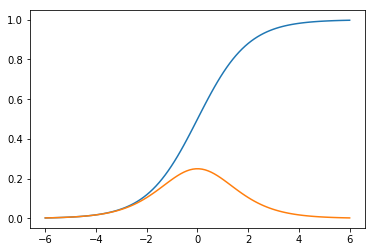

In [93]:
#let's try to plot sigmoid(x)
T = np.linspace(-6, 6, 100)
Y = sigmoid(T)
YS = sigmoid_p(T)
plt.plot(T, Y)
plt.plot(T, YS)

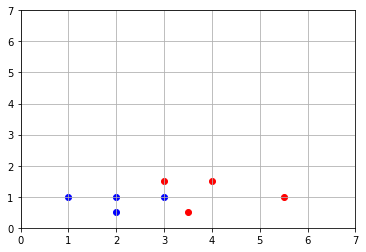

In [94]:
# let's scatter plot our data
plt.axis([0, 7, 0, 7])
plt.grid()
for i in range(len(data)):
    point = data[i]
    color = "r"
    if point[2] == 0:
        color = "b"
    plt.scatter(point[0], point[1], c = color)

In [ ]:
#training loop steps: 
# 1. Loop over the data many times
# 2. Pick out a random point from the data
# 3. Run the random point through the network 
# 4. See what it should have been (calculate the cost)
# 5. Take the derivative of the cost with respect to the network parameters ws, b
# 6. Use the result in 5 to update the network parameters ws, b by substracting it and as a result decreasing the cost
# 7. And if we see enough points, we're gonna get better and better predictions

learning_rate = 0.001
costs = []
for i in range(50000):
    #random index to pick random data point
    ri = np.random.randint(len(data))
    point = data[ri]
    
    #let's feed the point into the network
    z = point[0] * w1 + point[1] * w2 + b
    #apply activation function
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target)
    
    costs.append(cost)
    
    #let's calculate the deriv of cost with respect to ws and b
    dcost_pred = 2*(pred - target) #power rule
    dpred_z = sigmoid_p(z)
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_b = 1
    
    dcost_dz = dcost_pred * dpred_z
    
    #let's chain them. Get the deriv of the cost to each one of our prarameterss
    dcost_dw1 = dcost_dz * dz_dw1 
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_db = dcost_dz * dz_b
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db

plt.plot(costs)